In [1]:
#############################################################################
############ Name - Nupur Srivastava ########################################
############ Global Shipbreaking Data Pipeline ##############################

#### <b> For this project excel files from the years - 2014, 2016, 2020, 2023 and 2025 were used. The below operations were performed:-
#### 1. Data Pipeline & Schema Harmonization
#### 2. Data Integration & Exploratory Analysis
#### 3. Predictive Modeling  
#### 4. Temporal Analysis - Do older ships tend to be dismantled in specific regions?

In [2]:
# Load some of the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
########## Phase 1: Data Pipeline & Schema Harmonization #############
######################################################################

### <u>Step 1: File Conversion

In [4]:
######## 2024 Dataset ##################
########################################

In [5]:
# Load the year 2024 excel file

df_y24 = pd.read_excel('2024-List-of-all-ships-dismantled-all-over-the-world.xlsx')

In [6]:
df_y24.head()

,VESSEL,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,FLAG,Unnamed: 7,OWNERSHIP,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,DESTINATION,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,IMO#,NAME,TYPE,GT,LDT,BUILT,FLAG,FLAG PRIOR LAST VOYAGE,BENEFICIAL OWNER,BO COUNTRY,COMMERCIAL OPERATOR,REGISTERED OWNER,RO COUNTRY,PLACE,COUNTRY,ARRIVAL,NaN,*The data gathered by the NGO Shipbreaking Pla...
1,6922262,SEA NASS,General Cargo Ship,1603,697,1969,Bahrain,NaN,United Cement Co WLL,Bahrain,United Cement Co WLL,United Cement Co WLL,Bahrain,Alang,India,2024-11-01 00:00:00,NaN,NaN
2,9072226,JAHAN BROTHERS,Bulk Carrier,25899,8032,1994,Bangladesh,NaN,Kabir Steel Re-Rolling Mills,Bangladesh,Brave Royal Ship Management,Maa Shipping Pvt Ltd,Bangladesh,Chittagong,Bangladesh,2024-02-01 00:00:00,NaN,NaN
3,9159438,KHADEEJAH JAHAN,Bulk Carrier,25074,6994,1997,Bangladesh,NaN,Kabir Steel Re-Rolling Mills,Bangladesh,Brave Royal Ship Management,SR Shipping Ltd,Bangladesh,Chittagong,Bangladesh,2024-06-01 00:00:00,NaN,NaN
4,7924322,YAZ,General Cargo Ship,2023,1600,1981,Sierra Leone,NaN,Farah Shipping Ltd,Belize,Farah Shipping Ltd,Farah Shipping Ltd,Belize,Aliaga,Turkey,2024-07-01 00:00:00,NaN,NaN


In [7]:
# The first row has the column name so will replace the headers with values in first row.

df_y24.columns = df_y24.iloc[0]     
df_y24 = df_y24.drop(0).reset_index(drop=True)

In [8]:
# Format the column name by converting it into string data type, removing extra spaces and converting into upper case.
# Removing the last two columns which hold no information regarding columns

df_y24.columns = df_y24.columns.astype(str).str.strip().str.upper()
df_y24 = df_y24.iloc[:,:-2] 

In [9]:
df_y24.head()

,IMO#,NAME,TYPE,GT,LDT,BUILT,FLAG,FLAG PRIOR LAST VOYAGE,BENEFICIAL OWNER,BO COUNTRY,COMMERCIAL OPERATOR,REGISTERED OWNER,RO COUNTRY,PLACE,COUNTRY,ARRIVAL
0,6922262,SEA NASS,General Cargo Ship,1603,697,1969,Bahrain,NaN,United Cement Co WLL,Bahrain,United Cement Co WLL,United Cement Co WLL,Bahrain,Alang,India,2024-11-01 00:00:00
1,9072226,JAHAN BROTHERS,Bulk Carrier,25899,8032,1994,Bangladesh,NaN,Kabir Steel Re-Rolling Mills,Bangladesh,Brave Royal Ship Management,Maa Shipping Pvt Ltd,Bangladesh,Chittagong,Bangladesh,2024-02-01 00:00:00
2,9159438,KHADEEJAH JAHAN,Bulk Carrier,25074,6994,1997,Bangladesh,NaN,Kabir Steel Re-Rolling Mills,Bangladesh,Brave Royal Ship Management,SR Shipping Ltd,Bangladesh,Chittagong,Bangladesh,2024-06-01 00:00:00
3,7924322,YAZ,General Cargo Ship,2023,1600,1981,Sierra Leone,NaN,Farah Shipping Ltd,Belize,Farah Shipping Ltd,Farah Shipping Ltd,Belize,Aliaga,Turkey,2024-07-01 00:00:00
4,8101628,SOGDIANA,General Cargo Ship,1923,0,1982,Cameroon,NaN,Boyd Lines Ltd,Belize,Boyd Lines Ltd,Boyd Lines Ltd,Belize,Aliaga,Turkey,2024-11-01 00:00:00


In [10]:
# Added a column 'YEAR' based on file name to do time series analysis

df_y24['YEAR'] = 2024

In [11]:
df_y24.head()

,IMO#,NAME,TYPE,GT,LDT,BUILT,FLAG,FLAG PRIOR LAST VOYAGE,BENEFICIAL OWNER,BO COUNTRY,COMMERCIAL OPERATOR,REGISTERED OWNER,RO COUNTRY,PLACE,COUNTRY,ARRIVAL,YEAR
0,6922262,SEA NASS,General Cargo Ship,1603,697,1969,Bahrain,NaN,United Cement Co WLL,Bahrain,United Cement Co WLL,United Cement Co WLL,Bahrain,Alang,India,2024-11-01 00:00:00,2024
1,9072226,JAHAN BROTHERS,Bulk Carrier,25899,8032,1994,Bangladesh,NaN,Kabir Steel Re-Rolling Mills,Bangladesh,Brave Royal Ship Management,Maa Shipping Pvt Ltd,Bangladesh,Chittagong,Bangladesh,2024-02-01 00:00:00,2024
2,9159438,KHADEEJAH JAHAN,Bulk Carrier,25074,6994,1997,Bangladesh,NaN,Kabir Steel Re-Rolling Mills,Bangladesh,Brave Royal Ship Management,SR Shipping Ltd,Bangladesh,Chittagong,Bangladesh,2024-06-01 00:00:00,2024
3,7924322,YAZ,General Cargo Ship,2023,1600,1981,Sierra Leone,NaN,Farah Shipping Ltd,Belize,Farah Shipping Ltd,Farah Shipping Ltd,Belize,Aliaga,Turkey,2024-07-01 00:00:00,2024
4,8101628,SOGDIANA,General Cargo Ship,1923,0,1982,Cameroon,NaN,Boyd Lines Ltd,Belize,Boyd Lines Ltd,Boyd Lines Ltd,Belize,Aliaga,Turkey,2024-11-01 00:00:00,2024


In [12]:
######## 2023 Dataset ##################
########################################

In [13]:
# Load the year 2023 excel file

df_y23 = pd.read_excel('2023-List-of-all-ships-dismantled-all-over-the-world.xlsx')

In [14]:
df_y23.head()

,VESSEL,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,FLAG,Unnamed: 7,OWNERSHIP,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,DESTINATION,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,IMO#,NAME,TYPE,GT,LDT,BUILT,LAST FLAG (CHANGE FOR BREAKING),PREVIOUS FLAG,BENEFICIAL OWNER,BO COUNTRY,COMMERCIAL OPERATOR,REGISTERED OWNER,RO COUNTRY,PLACE,COUNTRY,ARRIVAL,NaN,*The data gathered by the NGO Shipbreaking Pla...
1,9172583,ALANA,Crude Oil Tanker,79714,22471,1998,Antigua & Barbuda,NaN,Alana Lines Inc,Antigua & Barbuda,Seagull Shipping Ltd,Alana Lines Inc,Antigua & Barbuda,Chittagong,Bangladesh,2023-10-01 00:00:00,NaN,NaN
2,9283772,SIRIUS,Products Tanker,25382,8585,2004,Australia,NaN,Australia Govt,Australia,Australia Govt AASGRP,Australia Govt Royal Navy,Australia,Kwinana,Australia,2023-01-01 00:00:00,NaN,NaN
3,9132923,ABDULLAH,Bulk Carrier,26070,7528,1996,Bangladesh,NaN,Kabir Steel Re-Rolling Mills,Bangladesh,Brave Royal Ship Management,Maa Shipping Pvt Ltd,Bangladesh,Chittagong,Bangladesh,2023-09-01 00:00:00,NaN,NaN
4,9118446,JAHAN,Bulk Carrier,26049,7516,1995,Bangladesh,NaN,Kabir Steel Re-Rolling Mills,Bangladesh,Brave Royal Ship Management,Jahan Marine Pvt Ltd,Bangladesh,Chittagong,Bangladesh,2023-10-01 00:00:00,NaN,NaN


In [15]:
# The first row has the column name so will replace the headers with values in first row.

df_y23.columns = df_y23.iloc[0]
df_y23 = df_y23.drop(0).reset_index(drop=True)

In [16]:
# Format the column name by converting it into string data type, removing extra spaces and converting into upper case.
# Removing the last two columns which hold no information regarding columns

df_y23.columns = df_y23.columns.astype(str).str.strip().str.upper()
df_y23 = df_y23.iloc[:,:-2]

In [17]:
# Added a column 'YEAR' based on file name to do time series analysis

df_y23['YEAR'] = 2023

In [18]:
df_y23.head()

,IMO#,NAME,TYPE,GT,LDT,BUILT,LAST FLAG (CHANGE FOR BREAKING),PREVIOUS FLAG,BENEFICIAL OWNER,BO COUNTRY,COMMERCIAL OPERATOR,REGISTERED OWNER,RO COUNTRY,PLACE,COUNTRY,ARRIVAL,YEAR
0,9172583,ALANA,Crude Oil Tanker,79714,22471,1998,Antigua & Barbuda,NaN,Alana Lines Inc,Antigua & Barbuda,Seagull Shipping Ltd,Alana Lines Inc,Antigua & Barbuda,Chittagong,Bangladesh,2023-10-01 00:00:00,2023
1,9283772,SIRIUS,Products Tanker,25382,8585,2004,Australia,NaN,Australia Govt,Australia,Australia Govt AASGRP,Australia Govt Royal Navy,Australia,Kwinana,Australia,2023-01-01 00:00:00,2023
2,9132923,ABDULLAH,Bulk Carrier,26070,7528,1996,Bangladesh,NaN,Kabir Steel Re-Rolling Mills,Bangladesh,Brave Royal Ship Management,Maa Shipping Pvt Ltd,Bangladesh,Chittagong,Bangladesh,2023-09-01 00:00:00,2023
3,9118446,JAHAN,Bulk Carrier,26049,7516,1995,Bangladesh,NaN,Kabir Steel Re-Rolling Mills,Bangladesh,Brave Royal Ship Management,Jahan Marine Pvt Ltd,Bangladesh,Chittagong,Bangladesh,2023-10-01 00:00:00,2023
4,8216722,RIOI,Refrigerated Cargo Ship,4878,3149,1984,Cameroon,NaN,Atlantic Trawlers Ltd,Belize,Atlantic Trawlers Ltd,Atlantic Trawlers Ltd,Belize,Aliaga,Turkey,2023-07-01 00:00:00,2023


In [19]:
######## 2020 Dataset ##################
########################################

In [20]:
# Load the year 2020 excel file

df_y20 = pd.read_excel('2020-List-of-all-ships-dismantled-all-over-the-world.xlsx')

In [21]:
df_y20.head()

,VESSEL,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,FLAG,Unnamed: 7,OWNERSHIP,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,DESTINATION,Unnamed: 14,Unnamed: 15,Unnamed: 16,"*The data gathered by the NGO Shipbreaking Platform is sourced from different outlets and stakeholders, and is cross-checked whenever possible.\nThe data upon which this information is based is correct to the best of the Platform’s knowledge, and the Platform takes no responsibility for the accuracy of the information provided. \nThe Platform will correct or complete data if any inaccuracy is signaled. All data which has been provided is publicly available and does not reveal any confidential business information."
0,IMO#,NAME,TYPE,GT,LDT,BUILT,LAST FLAG,PREVIOUS FLAG,BENEFICIAL OWNER,BO COUNTRY,COMMERCIAL OPERATOR,REGISTERED OWNER,RO COUNTRY,PLACE,COUNTRY,ARRIVAL,NaN,NaN
1,7724253,OTTO,Rail Vehicles Carrier,5309,3605,1978,Cameroon,NaN,Shega-Group SA,Albania,Shega-Group SA,Shega Trans SA,Albania,Aliaga,Turkey,2020-01-01 00:00:00,NaN,NaN
2,7118181,EDARTE,General Cargo Ship,1227,902,1971,Cameroon,NaN,Vital Shipping Co,Albania,Vital Shipping Co,Vital Shipping Co,Albania,Aliaga,Turkey,2020-08-01 00:00:00,NaN,NaN
3,7624037,SOM GOLD,Trailing Suction Hopper Dredger,4284,3703,1979,St Kitts & Nevis,Bahrain,Dream Group WLL,Bahrain,Nass Dredging Co SPC,Nass Dredging Co SPC,Bahrain,Gadani,Pakistan,2020-10-01 00:00:00,NaN,NaN
4,8407280,GRAND ROYAL,Bulk Carrier,22155,6960,1987,Bangladesh,NaN,Mariners Associates CTG Ltd,Bangladesh,Vanguard Maritime Ltd,Vanguard Maritime Ltd,Bangladesh,Chattogram,Bangladesh,2020-05-01 00:00:00,NaN,NaN


In [22]:
# The first row has the column name so will replace the headers with values in first row.

df_y20.columns = df_y20.iloc[0]

df_y20 = df_y20.drop(0).reset_index(drop=True)

In [23]:
# Format the column name by converting it into string data type, removing extra spaces and converting into upper case.
# Removing the last two columns which hold no information regarding columns

df_y20.columns = df_y20.columns.astype(str).str.strip().str.upper()

df_y20 = df_y20.iloc[:,:-2]

In [24]:
# Added a column 'YEAR' based on file name to do time series analysis

df_y20['YEAR'] = 2020

In [25]:
df_y20.head()

,IMO#,NAME,TYPE,GT,LDT,BUILT,LAST FLAG,PREVIOUS FLAG,BENEFICIAL OWNER,BO COUNTRY,COMMERCIAL OPERATOR,REGISTERED OWNER,RO COUNTRY,PLACE,COUNTRY,ARRIVAL,YEAR
0,7724253,OTTO,Rail Vehicles Carrier,5309,3605,1978,Cameroon,NaN,Shega-Group SA,Albania,Shega-Group SA,Shega Trans SA,Albania,Aliaga,Turkey,2020-01-01 00:00:00,2020
1,7118181,EDARTE,General Cargo Ship,1227,902,1971,Cameroon,NaN,Vital Shipping Co,Albania,Vital Shipping Co,Vital Shipping Co,Albania,Aliaga,Turkey,2020-08-01 00:00:00,2020
2,7624037,SOM GOLD,Trailing Suction Hopper Dredger,4284,3703,1979,St Kitts & Nevis,Bahrain,Dream Group WLL,Bahrain,Nass Dredging Co SPC,Nass Dredging Co SPC,Bahrain,Gadani,Pakistan,2020-10-01 00:00:00,2020
3,8407280,GRAND ROYAL,Bulk Carrier,22155,6960,1987,Bangladesh,NaN,Mariners Associates CTG Ltd,Bangladesh,Vanguard Maritime Ltd,Vanguard Maritime Ltd,Bangladesh,Chattogram,Bangladesh,2020-05-01 00:00:00,2020
4,9077252,CROWN VICTORY,Bulk Carrier,28818,8572,1994,Bangladesh,NaN,Ocean Victory Shipping Lines,Bangladesh,Ocean Victory Shipping Lines,Ocean Victory Shipping Lines,Bangladesh,Chattogram,Bangladesh,2020-12-01 00:00:00,2020


In [26]:
######## 2016 Dataset ##################
########################################

In [27]:
# Load the year 2016 excel file

df_y16 = pd.read_excel('2016-List-of-all-ships-dismantled-all-over-the-world.xlsx')

In [28]:
df_y16.head() 

,VESSEL,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,FLAG,OWNERSHIP,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,DESTINATION,Unnamed: 13,Unnamed: 14
0,NAME,IMO#,TYPE,GT,BUILT,LAST FLAG,BENEFICIAL OWNER,BO COUNTRY,COMMERCIAL OPERATOR,REGISTERED OWNER,RO COUNTRY,DATE SOLD FOR BREAKING,PLACE,COUNTRY,ARRIVAL
1,Frosina,7125196,General Cargo,2757,1971,San Marino,Globex Sh P K,Albania,Globex Sh P K,Globex Sh P K,Albania,2016-11-02 00:00:00,Aliaga,Turkey,2016-11-03 00:00:00
2,Luena,8706088,Combined Chemical And Oil Tanker,22733,1990,Niue,Sociedade Nacional de Combustiveis de Angola E...,Angola,Sociedade Nacional de Combustiveis de Angola E...,SONANGOL Shipping Ngol Luena,Malta,2016-05-11 00:00:00,Gadani,Pakistan,2016-05-21 00:00:00
3,Trident,8808537,Product Tanker,19034,1997,Djibouti,Trans-Ona S.A.M.C.I.F.,Argentina,Trans-Ona S.A.M.C.I.F.,Trans-Ona S.A.M.C.I.F.,Argentina,2016-03-24 00:00:00,Gadani,Pakistan,2016-05-14 00:00:00
4,Cent,8203309,Bulk Carrier With Container Capacity,13004,1982,Palau,Maritima Maruba SCA (Sociedad en Comandita por...,Argentina,Maritima Maruba SCA (Sociedad en Comandita por...,Maritima Maruba SCA (Sociedad en Comandita por...,Argentina,2016-08-29 00:00:00,Alang,India,2016-10-05 00:00:00


In [29]:
# The first row has the column name so will replace the headers with values in first row.

df_y16.columns = df_y16.iloc[0]

df_y16 = df_y16.drop(0).reset_index(drop=True)

In [30]:
# Format the column name by converting it into string data type, removing extra spaces and converting into upper case.
# Removing the last two columns which hold no information regarding columns

df_y16.columns = df_y16.columns.astype(str).str.strip().str.upper()


In [31]:
# Added a column 'YEAR' based on file name to do time series analysis

df_y16['YEAR'] = 2016

In [32]:
df_y16.head()

,NAME,IMO#,TYPE,GT,BUILT,LAST FLAG,BENEFICIAL OWNER,BO COUNTRY,COMMERCIAL OPERATOR,REGISTERED OWNER,RO COUNTRY,DATE SOLD FOR BREAKING,PLACE,COUNTRY,ARRIVAL,YEAR
0,Frosina,7125196,General Cargo,2757,1971,San Marino,Globex Sh P K,Albania,Globex Sh P K,Globex Sh P K,Albania,2016-11-02 00:00:00,Aliaga,Turkey,2016-11-03 00:00:00,2016
1,Luena,8706088,Combined Chemical And Oil Tanker,22733,1990,Niue,Sociedade Nacional de Combustiveis de Angola E...,Angola,Sociedade Nacional de Combustiveis de Angola E...,SONANGOL Shipping Ngol Luena,Malta,2016-05-11 00:00:00,Gadani,Pakistan,2016-05-21 00:00:00,2016
2,Trident,8808537,Product Tanker,19034,1997,Djibouti,Trans-Ona S.A.M.C.I.F.,Argentina,Trans-Ona S.A.M.C.I.F.,Trans-Ona S.A.M.C.I.F.,Argentina,2016-03-24 00:00:00,Gadani,Pakistan,2016-05-14 00:00:00,2016
3,Cent,8203309,Bulk Carrier With Container Capacity,13004,1982,Palau,Maritima Maruba SCA (Sociedad en Comandita por...,Argentina,Maritima Maruba SCA (Sociedad en Comandita por...,Maritima Maruba SCA (Sociedad en Comandita por...,Argentina,2016-08-29 00:00:00,Alang,India,2016-10-05 00:00:00,2016
4,Austral Leader II,7382770,Trawler,1045,1975,Australia,Austral Fisheries Proprietary Limited,Australia,Austral Fisheries Proprietary Limited,Austral Fisheries Proprietary Limited,Australia,2016-04-02 00:00:00,Alang,India,2016-04-09 00:00:00,2016


In [33]:
######## 2014 Dataset ##################
########################################

In [34]:
# Load the year 2014 excel file

df_y14 = pd.read_excel('2014-List-of-all-ships-dismantled-all-over-the-world.xlsx', header = None)

In [35]:
df_y14.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Country of the beneficial owner,Beneficial owner of the ship,Name of ship,IMO number,Last flag,Flag changed for breaking,Date of change,Commercial Operator of the ship,Registered owner of the ship,Destination city,Destination country,Beaching date,Type of ship,Built in (y),Gross tonnage (GT)
1,Aland Islands,Rederi-A/B Eckero,Translandia,7429229,Comoros,NaN,NaN,Rederi-A/B Eckero,Rederi-A/B Eckero,Alang,India,2014-05-24 00:00:00,RoRo,1976,13867
2,Albania,Albartin Shipping Company,Kneo,7526613,Albania,NaN,NaN,Albartin Shipping Company,Nereida Sh.p.k.,Aliaga,Turkey,2014-03-10 00:00:00,General Cargo With Container Capacity,1977,3473
3,Albania,All Ferries S.A.,Adriatica Queen,7329522,Panama,NaN,NaN,All Ferries S.A.,All Ferries S.A.,Aliaga,Turkey,2014-04-22 00:00:00,Passenger Ro/Ro,1974,10002
4,Angola,Sociedade Nacional de Combustiveis de Angola E...,Lucy,8319902,Comoros,Curacao,2014-02-01 00:00:00,Sociedade Nacional de Combustiveis de Angola E...,G House-Lucala NV,Alang,India,2014-03-01 00:00:00,Tanker,1986,36512


In [36]:
df_y14 = df_y14.dropna(how='all')

df_y14 = df_y14.reset_index(drop=True)

df_y14.columns = df_y14.iloc[0]

df_y14 = df_y14[1:].reset_index(drop=True)

#### The 2014 Excel file was imported using header=None since the column names were not properly recognized in the source. There were many blank rows, so all fully empty rows were removed using dropna(how='all'), and the index was reset for consistency. The first valid row, which contained the actual column headers, was then assigned as the DataFrame’s column names using df.iloc[0]

In [37]:
# Added a column 'YEAR' based on file name to do time series analysis

df_y14['YEAR'] = 2014

In [38]:
df_y14.head()

,Country of the beneficial owner,Beneficial owner of the ship,Name of ship,IMO number,Last flag,Flag changed for breaking,Date of change,Commercial Operator of the ship,Registered owner of the ship,Destination city,Destination country,Beaching date,Type of ship,Built in (y),Gross tonnage (GT),YEAR
0,Aland Islands,Rederi-A/B Eckero,Translandia,7429229,Comoros,NaN,NaN,Rederi-A/B Eckero,Rederi-A/B Eckero,Alang,India,2014-05-24 00:00:00,RoRo,1976,13867,2014
1,Albania,Albartin Shipping Company,Kneo,7526613,Albania,NaN,NaN,Albartin Shipping Company,Nereida Sh.p.k.,Aliaga,Turkey,2014-03-10 00:00:00,General Cargo With Container Capacity,1977,3473,2014
2,Albania,All Ferries S.A.,Adriatica Queen,7329522,Panama,NaN,NaN,All Ferries S.A.,All Ferries S.A.,Aliaga,Turkey,2014-04-22 00:00:00,Passenger Ro/Ro,1974,10002,2014
3,Angola,Sociedade Nacional de Combustiveis de Angola E...,Lucy,8319902,Comoros,Curacao,2014-02-01 00:00:00,Sociedade Nacional de Combustiveis de Angola E...,G House-Lucala NV,Alang,India,2014-03-01 00:00:00,Tanker,1986,36512,2014
4,Angola,Sociedade Nacional de Combustiveis de Angola E...,Blue 1,8319914,Comoros,Curacao,2014-01-23 00:00:00,Sociedade Nacional de Combustiveis de Angola E...,G. House Lueji NV,Gadani,Pakistan,2014-02-28 00:00:00,Tanker,1986,36512,2014


In [39]:
# 5 converted csv files from years - 2014, 2016, 2020, 2023 and 2024

df_y14.to_csv('Year2014.csv', index=False) 

df_y16.to_csv('Year2016.csv', index=False)

df_y20.to_csv('Year2020.csv',index=False)

df_y23.to_csv('Year2023.csv', index=False)

df_y24.to_csv('Year2024.csv', index=False)


#### After the completion of step 1, the five initial excel files were converted into csv files. There were several encoding and formatting issues that were taken care of including: 

#### 1. The excel file had inorrect headers which were fixed by replacing them with the first data row, ensuring accurate column alignment.
#### 2. The last two columns had NaN's for years 2024,2023 and 2020 which were removed to ensure only relevant columns remain.
#### 3. Column YEAR was derived from the file year to get the data ready for time series analysis.

#### These steps produced five standardized CSV files with clearly defined headers and consistent data structures, forming the foundation for schema harmonization in Step 2.

### <u> Step 2: Schema Discovery & Unification 

### In this step we will harmonize schema table with unified column names, correct mappings and data types.

#### <b> Schema unification:

#### (i) We can see that IMO is given as IMO number or IMO# across different years so we can standardized it to IMO. (ii) We were missing the column name YEAR which is important for time series analysis so column YEAR was added (YEAR comes from the file’s year). (iii) Name of ship/Name is standardized to 'NAME' to ensure consistency across all column names. (iv) Type of ship/ TYPE is standardized to 'TYPE' to ensure consistency across all column names. (v) GT/ Gross tonnage (GT) is standardized to 'GT' to ensure consistency across all column names. (vi) LDT is standardized to 'LDT'. (vii) LAST FLAG/ Last flag/ LAST FLAG (CHANGE FOR BREAKING) is standardized to 'LAST FLAG' to ensure consistency. (viii) BUILT/ Built in (y) is standardized to 'BUILT' to ensure consistency across all column names. (ix) PLACE/ Destination city is standardized to 'PLACE' to ensure consistency across all column names. (x) COUNTRY/ Destination country is standardized to 'COUNTRY'to ensure consistency across all column names.

#### <b> Data types & consistency: 
#### We normalize numeric fields by removing punctuation (commas) and coercing types: Numeric columns like 'GT' and 'LDT' will have float data types. Columns 'YEAR', 'BUILT' will be of integer data type. Columns 'PLACE', 'COUNTRY', 'IMO', 'TYPE', 'LAST FLAG' and 'NAME' will be of string data type. 

#### <b> Imputation for missing column LDT: 
#### LDT is frequently missing in 2014 and 2016. We will fit a simple linear regression with GT as the independent variable and LDT as the dependent variable, trained on complete rows from 2020, 2023, and 2024. If the GT–LDT correlation is strong, we’ll impute missing LDT using the model’s predictions; any remaining gaps will be filled conservatively via medians.

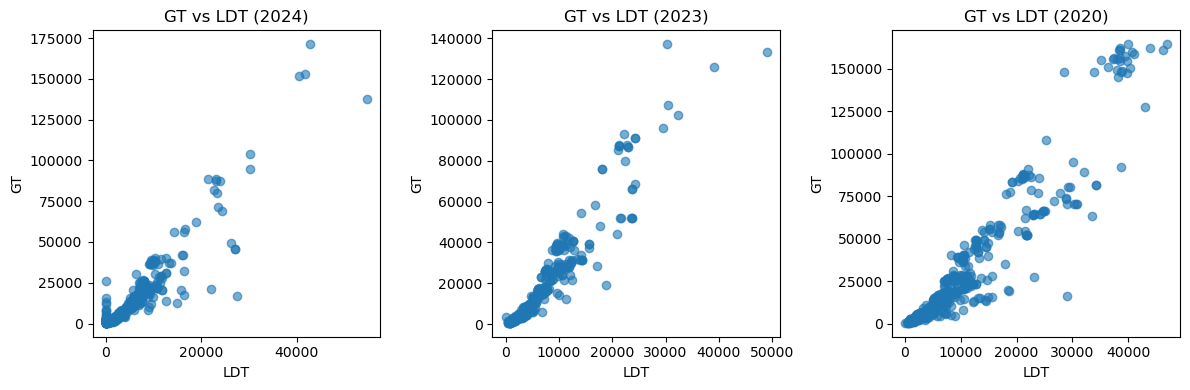

Correlation for 2024: 0.9244
Correlation for 2023: 0.9501
Correlation for 2020: 0.9497


In [40]:
dfs = [df_y24, df_y23, df_y20]
years = [2024, 2023, 2020]

plt.figure(figsize=(12, 4))

for i, (df, yr) in enumerate(zip(dfs, years), 1):
    plt.subplot(1, 3, i)
    plt.scatter(x=df['LDT'], y=df['GT'], alpha=0.6)
    plt.title(f'GT vs LDT ({yr})')
    plt.xlabel('LDT')
    plt.ylabel('GT')

plt.tight_layout()
plt.show()

dfs = [df_y24, df_y23, df_y20]
years = [2024, 2023, 2020]

for df, yr in zip(dfs, years):
    corr = df[['GT', 'LDT']].corr().iloc[0, 1]   # correlation between GT and LDT
    print(f'Correlation for {yr}: {corr:.4f}')

### <i> Observation:

#### A high correlation between GT and LDT can be seen from the above scatterplots and correlation values(r > ~ 0.9) indicating that heavier ships by gross tonnage tend to have proportionally higher light displacement tonnage. Based on this an imputation using linear regression seems like a logical choice to calculate LDT values for years 2014 and 2016 respectively.

In [41]:
########## Phase 2: Data Integration & Exploratory Analysis #############
#########################################################################

### <u> Step 3: Integration Pipeline

In [42]:
%%writefile integrate_shipbreaking.py
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.linear_model import LinearRegression

# Input files (converted in Step 1)
FILES = {
    2014: "Year2014.csv",
    2016: "Year2016.csv",
    2020: "Year2020.csv",
    2023: "Year2023.csv",
    2024: "Year2024.csv"
}

# Gold schema for with 10 columns as discussed in step 2
GOLD_SCHEMA = [
    "YEAR", "IMO", "NAME", "TYPE", "GT", "LDT",
    "BUILT", "LAST FLAG", "PLACE", "COUNTRY"
]

# Dictionary with all alias names to unify inconsistent column names across years
ALIAS = {
    "IMO": ["IMO", "IMO NUMBER", "IMO#", "IMO NO", "IMO NO."],
    "NAME": ["NAME", "NAME OF SHIP", "VESSEL", "VESSEL NAME"],
    "TYPE": ["TYPE", "TYPE OF SHIP", "SHIP TYPE", "TYPE OF VESSEL"],
    "GT": ["GT", "GROSS TONNAGE", "GROSS TONNAGE (GT)", "GROSS TONNAGE, GT"],
    "LDT": ["LDT", "LIGHT DISPLACEMENT TONNAGE", "LIGHTWEIGHT", "LIGHT WEIGHT"],
    "BUILT": ["BUILT", "BUILT IN (Y)", "YEAR BUILT", "BUILD YEAR"],
    "LAST FLAG": ["LAST FLAG", "FLAG", "CHANGE OF FLAG FOR BREAKING", "FLAG CHANGED FOR BREAKING"],
    "PLACE": ["PLACE", "DESTINATION CITY", "PLACE OF DEMOLITION", "LOCATION"],
    "COUNTRY": ["COUNTRY", "DESTINATION COUNTRY", "COUNTRY OF DEMOLITION"],
    "YEAR": ["YEAR"]
}

# First matching column name from the aliases list returned
def pick_col(df, candidates):
 
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    return None


# Standardizes one dataset to match the GOLD_SCHEMA:

def unify_one(path):

    df = pd.read_csv(path, dtype="unicode")
    df.columns = df.columns.astype(str).str.strip().str.upper()

    out = pd.DataFrame(index=df.index)
    for tgt in GOLD_SCHEMA:
        src = pick_col(df, ALIAS.get(tgt, []))
        out[tgt] = df[src] if src else pd.NA

    # Convert numeric fields
    for c in ["GT", "LDT", "BUILT", "YEAR"]:
        out[c] = pd.to_numeric(out[c].astype(str).str.replace(",", ""), errors="coerce")

    # Clean string columns
    for c in ["IMO", "NAME", "TYPE", "LAST FLAG", "PLACE", "COUNTRY"]:
        out[c] = out[c].astype("string").str.strip()

    # check for invalid numeric values in GT, LDT and BUILT columns
    for c in ["GT", "LDT"]:
        out.loc[out[c].notna() & (out[c] <= 0), c] = np.nan

    out["BUILT"] = out["BUILT"].where(out["BUILT"].between(1900, 2035), pd.NA).astype("Int64")

    return out[GOLD_SCHEMA]


# Train a simple linear regression model: LDT ~ GT as discussed in the step 2 to impute missing LDT values
def train_ldt_model(df):
    
    train = df.dropna(subset=["GT", "LDT"])
    train = train[(train["GT"] > 0) & (train["LDT"] > 0)]
    if len(train) < 30:
        print(" Not enough valid data to train regression model.")
        return None

    X = train[["GT"]].to_numpy()
    y = train["LDT"].to_numpy()

    model = LinearRegression().fit(X, y)
    print(f"[MODEL] LDT = {model.coef_[0]:.3f} * GT + {model.intercept_:.2f} | R² = {model.score(X, y):.3f}")
    return model


def impute_missing_ldt(df, model):
    """Imputes missing LDT using regression model"""
    out = df.copy()

    if model is not None:
        req = out["LDT"].isna() & out["GT"].notna()
        if req.any():
            preds = np.maximum(model.predict(out.loc[req, ["GT"]]), 0)
            out.loc[req, "LDT"] = preds
            print(f" Regression-imputed LDT for {req.sum()} rows.")

    # Secondly - TYPE median applied  
    req = out["LDT"].isna() & out["TYPE"].notna()
    if req.any():
        medians = out.groupby("TYPE")["LDT"].median()
        out.loc[req, "LDT"] = out.loc[req, "TYPE"].map(medians)
        print(" median imputation applied.")

    # Lastly - overall median applied
    if out["LDT"].isna().any():
        median_val = out["LDT"].median()
        out["LDT"] = out["LDT"].fillna(median_val)
        print(f" Overall median ({median_val:.0f}) applied for remaining missing LDT values.")

    return out
    
##################### Main Function ###############################################################

def main():
    frames = []

    for yr, fname in FILES.items():
        path = Path(fname)
        if not path.exists():
            print(f" File not found: {fname}")
            continue

        df = unify_one(path)
        frames.append(df)
        print(f"- Loaded {fname} ({len(df)} rows)")

    if not frames:
        raise SystemExit("No files loaded. Check paths and filenames.")

    #  All year files combined
    comb_files = pd.concat(frames, ignore_index=True)

    # regression model for LDT ~ GT trained
    model = train_ldt_model(comb_files)

    # Impute missing LDT values
    comb_files = impute_missing_ldt(comb_files, model)

    # Remove invalid IMO rows
    before = len(comb_files)
    comb_files = comb_files.dropna(subset=["IMO"])
    print(f" Removed {before - len(comb_files)} rows with missing IMO.")

    # Drop duplicates and sort
    comb_files = comb_files.drop_duplicates(subset=["IMO", "NAME", "YEAR"], keep="first")
    comb_files = comb_files.sort_values(["YEAR", "COUNTRY", "PLACE", "TYPE", "NAME"]).reset_index(drop=True)

    # Save unified dataset
    out_path = "shipbreaking_unified.csv"
    comb_files.to_csv(out_path, index=False)
    print(f" Unified dataset saved: {out_path} ({len(comb_files)} rows)")


############## Execute #################################################################################

if __name__ == "__main__":
    main()

Overwriting integrate_shipbreaking.py


#### 1. This step creates a python script integrate_shipbreaking.py that loads and standardizes all 5 CSVs and applies harmonized schema mapping and imputing missing values as discussed in step 2.

#### 2. The final output is a single integrated dataset shipbreaking_unified.csv containing data across all 5 years after cleaning, standardization and imputations.

#### 3. As can be observed from above the model explains more than 89% of the variance in the model. Therefore, imputation using linear regression is working nicely in this situation. 

### <u> Step 4: Exploratory Data Analysis

In [43]:
# Load the unified csv

df = pd.read_csv("shipbreaking_unified.csv")

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3368 entries, 0 to 3367
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YEAR       3368 non-null   int64  
 1   IMO        3368 non-null   object 
 2   NAME       3368 non-null   object 
 3   TYPE       3368 non-null   object 
 4   GT         3362 non-null   float64
 5   LDT        3368 non-null   float64
 6   BUILT      3366 non-null   float64
 7   LAST FLAG  2924 non-null   object 
 8   PLACE      3367 non-null   object 
 9   COUNTRY    3368 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 263.3+ KB


In [45]:
df.head()

,YEAR,IMO,NAME,TYPE,GT,LDT,BUILT,LAST FLAG,PLACE,COUNTRY
0,2014,8315229,AK Brother,Bulk carrier,17879.0,6870.705873,1985.0,Panama,Chittagong,Bangladesh
1,2014,8902151,APJ Suryavir,Bulk carrier,38302.0,12233.145834,1990.0,India,Chittagong,Bangladesh
2,2014,8506488,Abyo One / Yo-1,Bulk carrier,35560.0,11513.182539,1987.0,Malta,Chittagong,Bangladesh
3,2014,9117844,Agatis,Bulk carrier,16498.0,6508.098538,1996.0,Panama,Chittagong,Bangladesh
4,2014,8412144,Alabama Belle,Bulk carrier,41808.0,13153.711594,1986.0,Philippines,Chittagong,Bangladesh


In [46]:
# Key visualizations 

In [47]:
# (a) Ships dismantled per year

In [48]:
# Count ships per year
ships_dismantled_yearly = df["YEAR"].value_counts().sort_index()

print(ships_dismantled_yearly)

YEAR
2014    1025
2016     860
2020     630
2023     444
2024     409
Name: count, dtype: int64


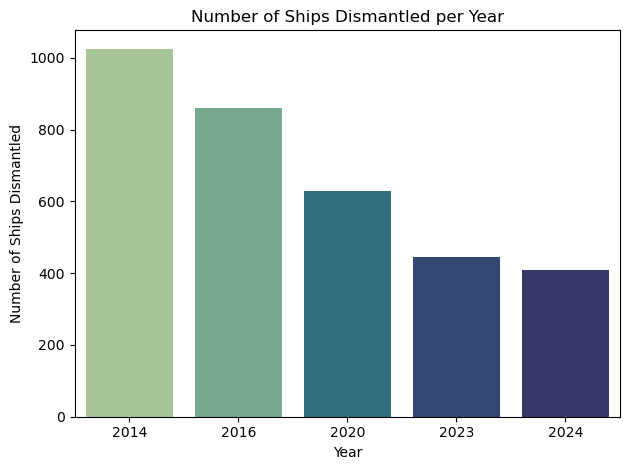

In [49]:
sns.barplot(
    x=ships_dismantled_yearly.index, 
    y=ships_dismantled_yearly.values, 
    hue=ships_dismantled_yearly.index,  
    palette="crest",
    legend=False          
)
plt.xlabel("Year")
plt.ylabel("Number of Ships Dismantled")
plt.title("Number of Ships Dismantled per Year")

plt.tight_layout()
plt.show()

### Out of all the years, the maximum number of ships were dismantled in the year 2014 (>1000) followed by 2016 (>800) and decreasing as years go by. We can observe a decresing trend over the years suggesting:
### 1. Stringent environmental laws making it harder for ship owners to dismantle 
### 2. Recent ships have better maintenance and work efficiently for a longer time.

In [50]:
# (b) Geographic breakdown (top dismantling countries)

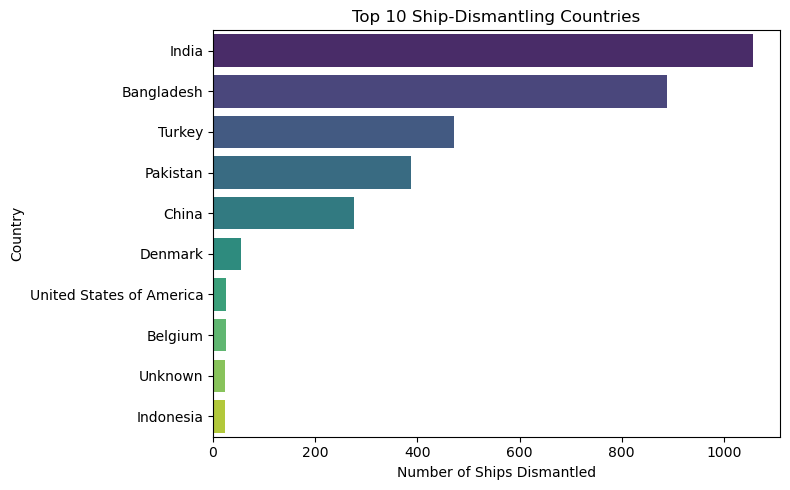

In [51]:
top_country_counts = df['COUNTRY'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_country_counts.values, y=top_country_counts.index, palette="viridis", hue=top_country_counts.index,legend = False)
plt.title("Top 10 Ship-Dismantling Countries")
plt.xlabel("Number of Ships Dismantled")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

### Top dismantling countries are India (>1000), Bangaldesh(~ 900), Turkey(~ 500) and Pakistan(~ 400). 
### 1. This suggests that South Asian countries are a major hub of shipbreaking industry.
### 2. The availability of cheap labour and less stringent laws makes the south asian region more attractive as compared to rest of the world.

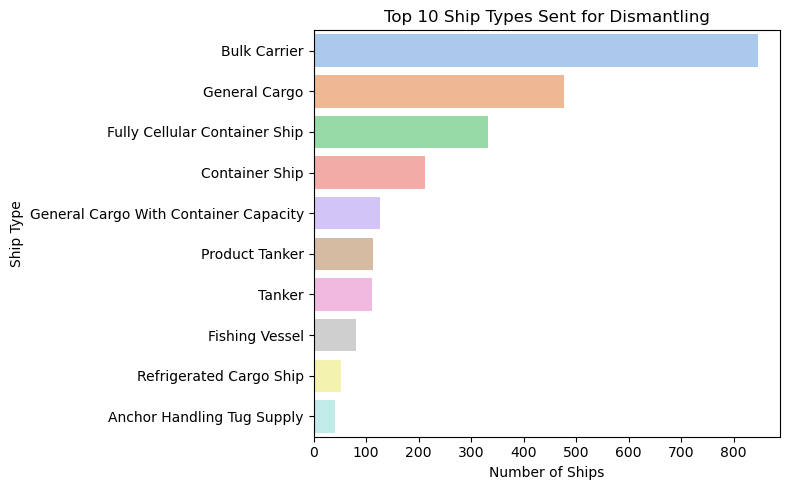

In [52]:
# (c) Distribution of ship types and ages (if available)

# Normalize ship type names
df['TYPE'] = (
    df['TYPE']
    .astype(str)
    .str.strip()                          # remove leading/trailing spaces
    .str.lower()                          # standardize case
    .str.replace(r'\s+', ' ', regex=True) # normalize spaces
    .str.replace('containership', 'container ship', regex=False)
    .str.replace('fully cellular containership', 'container ship', regex=False)
    .str.replace('container ship (fully cellular)', 'container ship', regex=False)
    .str.replace('general cargo ship', 'general cargo', regex=False)
    .str.replace('products tanker', 'product tanker', regex=False)
    .str.replace('bulk carrier', 'bulk carrier', regex=False)
)

df['TYPE'] = df['TYPE'].str.title()

ship_type_counts = df['TYPE'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=ship_type_counts.values, y=ship_type_counts.index, palette="pastel", hue = ship_type_counts.index)
plt.title("Top 10 Ship Types Sent for Dismantling")
plt.xlabel("Number of Ships")
plt.ylabel("Ship Type")
plt.tight_layout()
plt.show()


### It can be observed that the Bulk Carrier (>900), General Cargo (~ 500) and Fully Cellular Container(~ 350) and Container Ships (~ 250) are the most dismantled types out of all. This may suggest that:
### 1. They are the largest ship types or the most widely used and needs proper dismantling upon decommissioning or,
### 2. They are the most frequently operated in global routes, leading to higher wear and shorter operational lifespans compared to some of specialized vessels like tankers or fishing vessels.

### During integration, several ship type labels were found to be inconsistent across yearly datasets due to variations in spelling, capitalization, and naming conventions (e.g., “Fully Cellular Containership” vs. “Container Ship (Fully Cellular)”, “Bulk carrier” vs. “Bulk Carrier”). To ensure analytical consistency, the TYPE column was standardized through a normalization pipeline that converted all text to lowercase, removed excess spaces, and applied a set of replacement rules to unify equivalent terms. For example, all variants of Fully Cellular Containership and Container Ship (Fully Cellular) were consolidated under Container Ship, while General Cargo Ship was shortened to General Cargo. This cleaning step ensured that ship type categories were consistent across years, preventing double-counting and enabling accurate aggregation and visualization of dismantling trends by ship type.

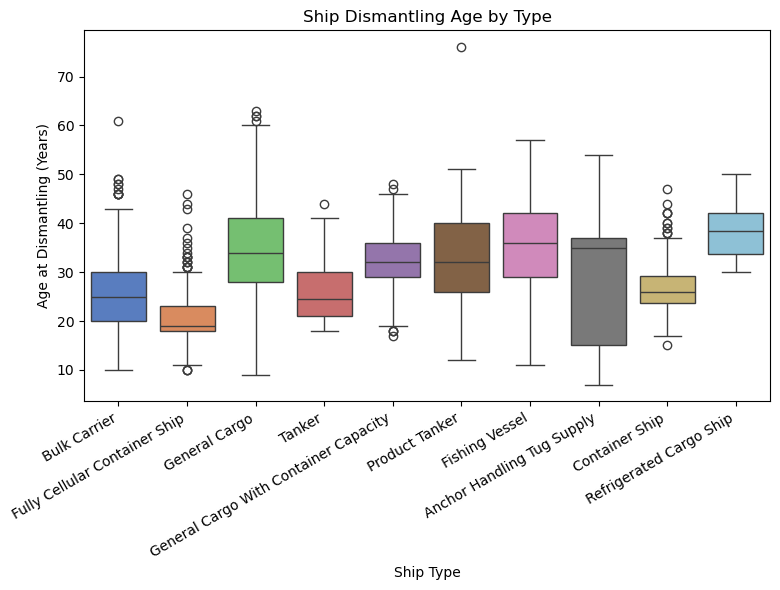

In [53]:
# Distribution of Ages based on ship Type

df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['BUILT'] = pd.to_numeric(df['BUILT'], errors='coerce')
df['AGE'] = df['YEAR'] - df['BUILT']
df = df[df['AGE'].between(0, 80)]

top_types = df['TYPE'].value_counts().head(10).index
subset = df[df['TYPE'].isin(top_types)]

plt.figure(figsize=(8,6))
sns.boxplot(data=subset, x='TYPE', y='AGE', palette ='muted', hue = 'TYPE', legend = False)
plt.title("Ship Dismantling Age by Type")
plt.xlabel("Ship Type")
plt.ylabel("Age at Dismantling (Years)")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


### 1. The General Cargo ships, Product Tanker and Fishing vessels are dismantled pretty late in life (around 35–40 years), suggesting these ships tend to operate longer before decommissioning.
### 2. Fully Cellular Container Ships and Container Ships have lower median ages (~20–25 years), indicating faster replacement cycles, possibly due to rapid technological advancements, etc.
### 3. Several ship types (e.g., Anchor Handling Tug Supply and General Cargo with Container Capacity) show wide variance and many outliers, indicating that dismantling decisions may depend on factors such as operational cost, market demand and maintenance.

In [54]:
################### Phase 3: Predictive Modeling ###################
####################################################################

### <u> Step 5: Build a Simple Classification Model

In [55]:
# load required libraries

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

df['COUNTRY'] = df['COUNTRY'].astype(str).str.lower().str.strip()

# Creating region for target variable
South_Asia = ['india', 'pakistan', 'bangladesh']
df['REGION'] = df['COUNTRY'].apply(lambda x: 'South Asia' if x in South_Asia else 'Other')


In [56]:
# Select features
features = ['LDT', 'BUILT', 'TYPE', 'LAST FLAG']
X = df[features]
y = df['REGION']

# Encode categorical variables
X = X.copy()
for col in ['TYPE', 'LAST FLAG']:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Handle missing numeric data
X = X.fillna(0)

# Scale numeric features
scaler = StandardScaler()
X[['LDT', 'BUILT']] = scaler.fit_transform(X[['LDT', 'BUILT']])


In [57]:
# Split train/test 70/30 split needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [58]:
# Model Evaluation

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f" Accuracy: {accuracy:.2f}")
print(f" F1-score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 0.73
 F1-score: 0.71

Classification Report:
               precision    recall  f1-score   support

       Other       0.58      0.41      0.48       310
  South Asia       0.77      0.87      0.82       699

    accuracy                           0.73      1009
   macro avg       0.67      0.64      0.65      1009
weighted avg       0.71      0.73      0.71      1009



### <u> Observation:
### 1. South Asia: The model performs well, it identifies 87% of all “South Asia” cases and is correct 77% of the time when it predicts that class.
### 2. The model correctly identifies 41% of “Other” cases. Precision is 0.58, so when it predicts “Other,” it’s correct around 58% of the time. This shows weaker performance when it comes to "Other" class.
### The model achieved an overall accuracy of 73%, indicating moderate predictive performance. The model performed substantially better on the “South Asia” class compared to the “Other” class, suggesting a bias toward the majority class.

## <u> Bonus: Do older ships tend to be dismantled in specific regions?

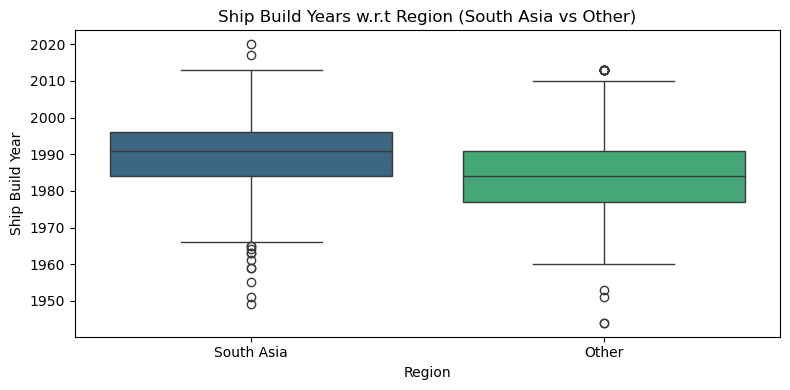

Average build year per region:
REGION
Other         1984.0
South Asia    1990.0
Name: BUILT, dtype: float64


In [59]:
# Only consider records where the ships were built less than 100 years back.

df = df[df['BUILT'] > 1925]

plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='REGION', y='BUILT', palette='viridis', hue = 'REGION', legend = False)
plt.title("Ship Build Years w.r.t Region (South Asia vs Other)")
plt.xlabel("Region")
plt.ylabel("Ship Build Year")
plt.tight_layout()
plt.show()

avg_by_region = df.groupby('REGION')['BUILT'].mean().round()
print("Average build year per region:")
print(avg_by_region)

### As can be observed from the above plot, the older ships appear to be dismantled more in other regions as compared to the younger ships which are mostly dismantled in South Asia (the diffrence is ~6 years). This could be due to various reasons -  1. The older ships may need to be dismantled under stricter regulations compared to some of the recent ship builds. 2. Some ship owners want to get the highest price out of selling their old vessels for scrap and they know that younger ships tend to fetch more price in some of the developing countries compared to selling it in other developed countries where their vessel's scrap may or may not be sold.

In [60]:
%%writefile requirements.txt
pandas>=2.0
numpy>=1.23
scikit-learn>=1.2
matplotlib>=3.7
seaborn>=0.12
openpyxl>=3.1



Overwriting requirements.txt
